# 1. Setup Mario

In [6]:
!pip install gym_super_mario_bros==7.3.0 nes_py

In [9]:
# Import the game
import gym
# Import the oJoypad wrapper
from nes_py.wrappers import JoypadSpace
# Import the SIMPLIFIED controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [12]:
# Important simplify game environnement

# Setup game
env = gym.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [13]:
# Create a flag - restart or not
done = True
# Loop through each frame in the game
for step in range(1000):
    # Start the game to begin with
    if done:
        # Start the gamee
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

/opt/anaconda3/lib/python3.8/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


# 2. Preprocess Environement


In [14]:
# Install pytorch
!pip3 install torch torchvision torchaudio

In [15]:
!pip install stable-baselines3[extra]

zsh:1: no matches found: stable-baselines3[extra]


In [16]:
from gym.wrappers import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
from matplotlib import pyplot as plt

In [31]:
# 1. Create the base environment
env = gym.make('SuperMarioBros-v0')
# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# 3. Grayscale
env = GrayScaleObservation(env,keep_dim=True)
# 4. Wrap inside the Dummy Environment
env = DummyVecEnv([lambda :env])
# 5. Stack the frames
env = VecFrameStack(env, 4, channels_order='last')

In [32]:
state = env.reset()


In [35]:
state.shape

(1, 240, 256, 4)

In [84]:
state, reward, done, info = env.step([5])

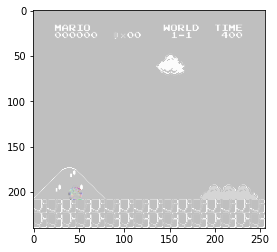

In [53]:
plt.imshow(state[0])

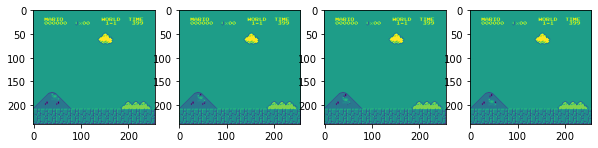

In [85]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])